In [5]:
# début du projet python

# Projet Python 2A : Performance énergétique des logements en France et caractéristiques socioéconomiques

Ce projet a pour but d’analyser la performance énergétique des logements en France métropolitaine (hors Corse) a une échelle départementale d’un point de vue socioéconomique. Il mettra en regard les caractéristiques des logements, les caractéristiques géographiques des départements étudiés mais également les caractéristiques socioéconomiques des habitants pour comprendre dans quelle mesure elles sont liées entre elles. Il sera réalisé à l’aide des données Insee et de données de l’Ademe et du ministère de la Transition Ecologique (a compléter modifier ex : ign si on a besoin de données géo, edf conso électrique etc. ).
# a reprendre

# Introduction

In [ ]:
# idée afficher une image / mème de Bruno Le Maire et de son col roulé 

L'augmentation des prix de l'énergie en 2022 ainsi que les risques de pénuruie notamment dus à la guerre en Ukraine, on conduit le ministre de l'Economie en France à suggérer aux français de baisser leur chauffage et de porter des cols roulés. 

Cela nous a donc amené à questionner la consommation énergétique des français, et en particulier, celle de leur logement. 
A partir des données de diagnostique de performance énergétique (DPE) des logements en France métropolitaine (hors Corse) issues de l'Agence de la transition écologique (Ademe), retraitées et augmentées par le ministère de la Transition Ecologique à partir de données sociofiscale produite par l'Institut National des Statistiques et des Etudes Economique (Insee, données filosofi) il est possible d'étudier le lien entre performance énergétique des logements et caractéristiques socioéconomiques du territoires et des habitants. En effet, le DPE, instauré en 2006 et obligatoire lors de la vente ou de la location d'un logement, est un indicateur de la performance énergétique et climatique à destination de l'ensemble des français mais également un outil des politiques publiques environementales. Il permet par exemple de repérer les passoires thermiques. 

L’analyse de la performance énergétique des bâtiments permet de contribuer à répondre à une demande citoyenne et politique. Dans le cadre de la transition écologique, elle représente un indicateur des politiques de rénovations à mener, et compte tenue de la mise jours des données, d’un suivi de cette même politique. En poursuivant l’étude sous un angle socioéconomique, le projet donne également à voir les différences territoriales, sociale et économique en termes de performance énergétique des logements et permet donc en partie d’évaluer sous le prisme des inégalités et de la redistribution les politiques récentes menées par le gouvernement : prime à la rénovation sous condition de revenu, obtention d’une note minimale au DPE pour mettre en location son logement etc. Ainsi, précrarité erngétique et précarité monétaire sont elles dépendantes ? 

L'étude est réalisée à l'échelle départementale. Plusieurs variables semblent pertinentes pour répondre à cette problématique

- Les caractéristiques du logement : type de logement, surface, date de construction, 
- Les cractéristiques des habitants : parc locatif (peut être a mettre en interaction avec le type de logement), statut d’occupation, revenus par quartile 
- La situation géographique : voir si l’on complète avec des données autres (ign/insee) : part de rural, zone d’emploi, températures, altitudes ; on peut aussi éventuellement essayer de faire parler des cartes en récupérant des données socioéconomiques à un niveau départemental qui nous manquerait (taux de chômage, taux de famille monoparentale, proportion de personne âgés, proportion d’enfants, proportions d’étudiants – qui peuvent être des publics cibles)


# 1. Descriptions des sources de données et de leurs récupérations 

## 1.1. Instalation des packages nécessaires

# Attention, a mettre à jour à chaque fois 

In [22]:
#!pip install pathlib2
#!pip install python-Levenshtein
#!pip install --upgrade xlrd
#!pip install git+https://github.com/InseeFrLab/Py-Insee-Data.git
!pip install requests
!pip install openpyxl 
!pip install xlrd==1.2.0

On importe ensuite les modules :

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import pynsee
#import pynsee.download
import requests

## 1.2. Autour des données 

### 1.2.1. Importation des données

#### Niveau national 

On commence par importer les données relatives au DPE issues du site du Service des Données et Etudes Statistiques (SDES) du ministère de la Transistion Ecologique. Nous allons travailler pour commencer sur les données nationale, en particulier sur l'onglet "Données locales - départements". 
L'affichage de la base de donnée permet de vérifier que ce dernier c'est bien passé. Cela donne aussi un premier apperçu du nettoyage qui ser ensuite nécessaire. 

In [3]:
url = 'https://www.statistiques.developpement-durable.gouv.fr/sites/default/files/2020-10/parc_logements_dpe_2018.xlsx'
s = requests.get(url).content

xl = pd.ExcelFile(s)  # io.BytesIO(s) is also work
xl.sheet_names        # see all sheet names

df_bdd_nat = xl.parse('Données locales - départements', nrows = 94, header = 0) 

In [43]:
df_bdd_nat.head(5)

,Département,A,B,C,D,E,F,G,Taux_A,Taux_B,Taux_C,Taux_D,Taux_E,Taux_F,Taux_G
0,1,4045.481744,14947.859970,50399.284564,79358.198695,62637.786293,27244.081590,19850.939052,0.015651,0.057829,0.194981,0.307014,0.242328,0.105400,0.076798
1,2,1358.182738,5343.744918,16897.259675,57252.828276,69185.693031,38252.237532,22656.068623,0.006439,0.025332,0.080102,0.271410,0.327978,0.181337,0.107402
2,3,1076.998237,2857.571424,21098.919567,47519.600985,45894.658951,23572.887522,17493.556769,0.006752,0.017914,0.132270,0.297902,0.287715,0.147779,0.109668
3,4,1922.048688,1638.787242,6722.580319,21872.642872,20019.934094,11401.938099,10092.664127,0.026090,0.022245,0.091252,0.296898,0.271749,0.154769,0.136997
4,5,528.860923,1314.368792,6833.226703,14893.719781,17720.801906,8803.285594,8689.476209,0.008997,0.022359,0.116243,0.253365,0.301458,0.149757,0.147821


On recommence la procédure pour récupérer les informations relatives aux occupants et les logements au niveau national

In [60]:
df_log_nat = xl.parse('Logements', nrows = 52, header = 0)  
df_hab_nat = xl.parse('Occupants - graphiques', nrows = 4, header = 7) 

In [61]:
df_log_nat.head(5)

,Type de logement,A,B,C,D,E,F,G,Total général
0,Appartement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Nombre,220866.148373,756984.869021,2576265.264322,4719173.51348,2836949.710115,1197256.277384,717023.277109,13024519.059803
2,Taux,0.016958,0.05812,0.197801,0.36233,0.217816,0.091923,0.055052,1
3,Maison individuelle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Nombre,298924.906133,613438.433528,2584832.265549,5072271.385708,4155781.38316,1878785.934819,991794.6313,15595828.940197


In [47]:
df_hab_nat.head(5)

,Unnamed: 0,Locataire (parc privé),Locataire (parc social),Propriétaires,Ensemble
0,1er quintile,0.278,0.070,0.233,0.193
1,2nd quintile,0.217,0.069,0.206,0.176
2,3e quintile,0.197,0.067,0.177,0.165
3,4e quintile,0.198,0.070,0.154,0.156


#### Niveau local 

On travaille également à un niveau local, départemental. 
Les données que l'on peut télécharger sur le site du SDES doivent être concaténées pour être exploitées.

In [ ]:
# introduire le code d'Antoine sur la concaténation des données départementales 

# si jamais on rajoute des données (ce qui serait bien) à introduire ici 

### 1.2.2. Traitement des bases de données

#### La base DPE nationale 

Plusieurs traitements sont necessaires pour exploiter la base DPE nationale. 
On vérifie qu'il n'y a pas de valeurs manquantes.

In [25]:
# Affichage des valeurs nulles
print(df_bdd_nat.isnull())

    Département      A      B      C      D      E      F      G  Taux_A  \
0         False  False  False  False  False  False  False  False   False   
1         False  False  False  False  False  False  False  False   False   
2         False  False  False  False  False  False  False  False   False   
3         False  False  False  False  False  False  False  False   False   
4         False  False  False  False  False  False  False  False   False   
..          ...    ...    ...    ...    ...    ...    ...    ...     ...   
89        False  False  False  False  False  False  False  False   False   
90        False  False  False  False  False  False  False  False   False   
91        False  False  False  False  False  False  False  False   False   
92        False  False  False  False  False  False  False  False   False   
93        False  False  False  False  False  False  False  False   False   

    Taux_B  Taux_C  Taux_D  Taux_E  Taux_F  Taux_G  
0    False   False   False   False

On va faire quelques statistiques descriptives simples pour vérifier qu'il n'y ait pas de valeurs abérantes.

In [51]:
df_bdd_nat.describe()

,Département,A,B,C,D,E,F,G,Taux_A,Taux_B,Taux_C,Taux_D,Taux_E,Taux_F,Taux_G
count,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000
mean,48.297872,5203.568042,14500.450321,54516.444424,103796.229721,74199.764835,32656.381216,18173.455028,0.015893,0.041316,0.161465,0.325177,0.255942,0.122758,0.077449
std,27.561790,6463.463094,14533.114230,53465.600998,88462.641064,54811.957701,25358.152106,15595.670559,0.011398,0.017564,0.057018,0.044485,0.041557,0.037433,0.049142
min,1.000000,91.900218,598.777581,3249.342024,8661.063024,7836.279532,4620.566918,1125.109024,0.001263,0.011176,0.054961,0.198765,0.145009,0.047204,0.006243
25%,25.250000,1305.761969,3711.609865,16523.120222,40339.762451,36195.777590,17142.564133,8763.627658,0.006792,0.029399,0.117163,0.295006,0.242916,0.100468,0.047091
50%,48.500000,3030.033853,9728.120472,37415.272376,75038.956085,60785.380102,27371.186448,15360.810434,0.012764,0.038522,0.153256,0.324655,0.263654,0.122788,0.071155
75%,71.750000,6492.121174,21365.772103,68876.042717,140153.412273,95204.395203,40344.216735,22978.624334,0.024182,0.049174,0.183485,0.355764,0.285487,0.148638,0.106305
max,95.000000,32411.438272,62308.598976,270902.771292,443890.792647,301892.731433,198800.346428,128932.816738,0.047185,0.111625,0.324565,0.425478,0.327978,0.215789,0.260148


Il n'y a pas de résultats choquants (des pourcentages supérieurs à 100) ou encore une quantité de logement démeusurée (par exemple). On retrouve également le bon nombre de département en France métropolitaine. 

On va donc passer à la construction de nouvelles variables. Pour cela on va créer une version "work" de la base de données. 

On va rajouter une colonne qui donne le DPE moyen pour chaque département.
On convient que le DPE A vaut 1 et que le DPE G faut 7, de sorte que plus le score obtenu est petit, meilleurs sont les logements du département.

In [56]:
DPE_moy=[]
nb_dep=len(df_bdd_nat) #il y a bien 94 départements en France métropolitaine, hors Corse
for i in range(nb_dep):
    DPE_score=0
    DPE_score=df_bdd_nat.iloc[i]["Taux_A"]*1+df_bdd_nat.iloc[i]["Taux_B"]*2+df_bdd_nat.iloc[i]["Taux_C"]*3+df_bdd_nat.iloc[i]["Taux_D"]*4+df_bdd_nat.iloc[i]["Taux_E"]*5+df_bdd_nat.iloc[i]["Taux_F"]*6+df_bdd_nat.iloc[i]["Taux_G"]*7
    DPE_moy.append(DPE_score)

df_bdd_nat_work=df_bdd_nat.copy(deep=True)

On concatène ci-dessous

In [57]:
df_bdd_nat_work=df_bdd_nat_work.assign(DPE_Moyen=DPE_moy)
# Vérifions que cela marche
df_bdd_nat_work.head(5)

,Département,A,B,C,D,E,F,G,Taux_A,Taux_B,Taux_C,Taux_D,Taux_E,Taux_F,Taux_G,DPE_Moyen
0,1,4045.481744,14947.859970,50399.284564,79358.198695,62637.786293,27244.081590,19850.939052,0.015651,0.057829,0.194981,0.307014,0.242328,0.105400,0.076798,4.325929
1,2,1358.182738,5343.744918,16897.259675,57252.828276,69185.693031,38252.237532,22656.068623,0.006439,0.025332,0.080102,0.271410,0.327978,0.181337,0.107402,4.862776
2,3,1076.998237,2857.571424,21098.919567,47519.600985,45894.658951,23572.887522,17493.556769,0.006752,0.017914,0.132270,0.297902,0.287715,0.147779,0.109668,4.723923
3,4,1922.048688,1638.787242,6722.580319,21872.642872,20019.934094,11401.938099,10092.664127,0.026090,0.022245,0.091252,0.296898,0.271749,0.154769,0.136997,4.778268
4,5,528.860923,1314.368792,6833.226703,14893.719781,17720.801906,8803.285594,8689.476209,0.008997,0.022359,0.116243,0.253365,0.301458,0.149757,0.147821,4.856483


On introduit également une colonne qui donne le total des logements par département. La densité de logement par département n'étant, a priori, pas la même, il se pourrait que la performance énergétique varie en fonction du nombre de logement. 

In [59]:
Log_tot=[]
nb_dep=len(df_bdd_nat) #il y a bien 94 départements en France métropolitaine, hors Corse
for i in range(nb_dep):
    Log_nb=0
    Log_nb=df_bdd_nat.iloc[i]["A"]+df_bdd_nat.iloc[i]["B"]+df_bdd_nat.iloc[i]["C"]+df_bdd_nat.iloc[i]["D"]+df_bdd_nat.iloc[i]["E"]+df_bdd_nat.iloc[i]["F"]+df_bdd_nat.iloc[i]["G"]
    Log_tot.append(Log_nb)

df_bdd_nat_work=df_bdd_nat.copy(deep=True)
df_bdd_nat_work=df_bdd_nat_work.assign(Log_totaux=Log_tot)
# Vérifions que cela marche
df_bdd_nat_work.head(5)

,Département,A,B,C,D,E,F,G,Taux_A,Taux_B,Taux_C,Taux_D,Taux_E,Taux_F,Taux_G,Log_totaux
0,1,4045.481744,14947.859970,50399.284564,79358.198695,62637.786293,27244.081590,19850.939052,0.015651,0.057829,0.194981,0.307014,0.242328,0.105400,0.076798,258483.631907
1,2,1358.182738,5343.744918,16897.259675,57252.828276,69185.693031,38252.237532,22656.068623,0.006439,0.025332,0.080102,0.271410,0.327978,0.181337,0.107402,210946.014793
2,3,1076.998237,2857.571424,21098.919567,47519.600985,45894.658951,23572.887522,17493.556769,0.006752,0.017914,0.132270,0.297902,0.287715,0.147779,0.109668,159514.193454
3,4,1922.048688,1638.787242,6722.580319,21872.642872,20019.934094,11401.938099,10092.664127,0.026090,0.022245,0.091252,0.296898,0.271749,0.154769,0.136997,73670.595441
4,5,528.860923,1314.368792,6833.226703,14893.719781,17720.801906,8803.285594,8689.476209,0.008997,0.022359,0.116243,0.253365,0.301458,0.149757,0.147821,58783.739909


#### La base logement nationale 

On passe ensuite à la base relative aux caractéristiques du logement. La base récupérée initialement sur le site du SDES contient plusieurs informations plus ou moins nécessaires. 
Nous choisissons d'en retenir qu'une partie. 

### Etudions les passoires thermiques DPE F ou G

Commençons par calculer le pourcentage de passoires thermiques dans chaque département

In [8]:
# Derive New Column from Existing Column

df_bdd_nat_work=df_bdd_nat_work.assign(Taux_Passoires_Thermique=(df_bdd_nat_work['Taux_F']+df_bdd_nat_work['Taux_G'])*100)

In [9]:
df_bdd_nat_work.head(20)

,Département,A,B,C,D,E,F,G,Taux_A,Taux_B,Taux_C,Taux_D,Taux_E,Taux_F,Taux_G,DPE_Moyen,Taux_Passoires_Thermique
0,1,4045.481744,14947.859970,50399.284564,79358.198695,62637.786293,27244.081590,19850.939052,0.015651,0.057829,0.194981,0.307014,0.242328,0.105400,0.076798,4.325929,18.219730
1,2,1358.182738,5343.744918,16897.259675,57252.828276,69185.693031,38252.237532,22656.068623,0.006439,0.025332,0.080102,0.271410,0.327978,0.181337,0.107402,4.862776,28.873883
2,3,1076.998237,2857.571424,21098.919567,47519.600985,45894.658951,23572.887522,17493.556769,0.006752,0.017914,0.132270,0.297902,0.287715,0.147779,0.109668,4.723923,25.744696
3,4,1922.048688,1638.787242,6722.580319,21872.642872,20019.934094,11401.938099,10092.664127,0.026090,0.022245,0.091252,0.296898,0.271749,0.154769,0.136997,4.778268,29.176637
4,5,528.860923,1314.368792,6833.226703,14893.719781,17720.801906,8803.285594,8689.476209,0.008997,0.022359,0.116243,0.253365,0.301458,0.149757,0.147821,4.856483,29.757824
5,6,11815.026075,32741.704372,168053.460347,212556.098431,87111.472985,31651.723590,10705.936616,0.021302,0.059033,0.302998,0.383236,0.157061,0.057068,0.019303,3.844133,7.637028
6,7,3450.067924,4613.980259,20072.427238,35529.974523,36784.778591,18058.046289,17657.344298,0.025337,0.033885,0.147411,0.260930,0.270145,0.132617,0.129675,4.633212,26.229182
7,8,357.615108,3440.964517,13073.048430,36849.557201,37741.272738,17002.884673,10990.062443,0.002994,0.028805,0.109439,0.308480,0.315944,0.142337,0.092001,4.700591,23.433805
8,9,729.642493,1878.391779,11710.841827,18670.598620,16823.926953,8738.068679,5995.503357,0.011304,0.029101,0.181431,0.289256,0.260646,0.135375,0.092886,4.536509,22.826124
9,10,598.450763,4300.754525,20864.624123,40957.694112,37944.387099,18652.026934,11393.319615,0.004442,0.031926,0.154884,0.304041,0.281672,0.138459,0.084576,4.580255,22.303516


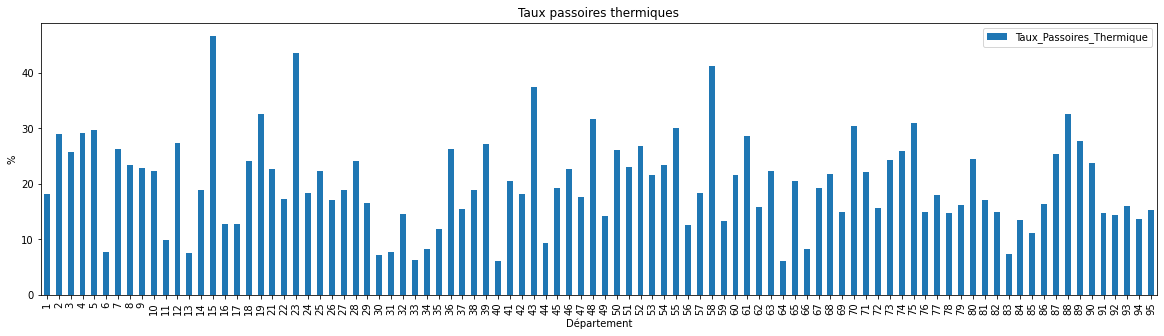

In [72]:
df_to_plot_1 = pd.DataFrame(df_bdd_nat_work,columns=['Département','Taux_Passoires_Thermique'])
df_to_plot_1.plot(x ='Département', y='Taux_Passoires_Thermique', kind = 'bar', figsize=(20,5), title="Taux passoires thermiques")
plt.xlabel('Département')
plt.ylabel('%')
plt.show()

Faisons un classement des meilleurs élèves

Pour plus de lisibilité, importons une base de données qui donne le nom des départements

In [10]:
url2 = 'https://www.business-plan-excel.fr/wp-content/uploads/2021/05/Liste-Excel-des-departements-francais.xlsx'
s2 = requests.get(url2).content

xl2 = pd.ExcelFile(s2)  # io.BytesIO(s) is also work
xl2.sheet_names        # see all sheet names

df_dep = xl2.parse('Départements français', nrows = 100, header = 0) 

In [105]:
df_dep.head(35)

,N°,Département,Chef-lieu,Région
0,01,Ain,Bourg-en-Bresse,Auvergne-Rhône-Alpes
1,02,Aisne,Laon,Hauts-de-France
2,03,Allier,Moulins,Auvergne-Rhône-Alpes
3,04,Alpes-de-Haute-Provence,Digne,Provence-Alpes-Côte d'Azur
4,05,Hautes-Alpes,Gap,Provence-Alpes-Côte d'Azur
5,06,Alpes-Maritimes,Nice,Provence-Alpes-Côte d'Azur
6,07,Ardèche,Privas,Auvergne-Rhône-Alpes
7,08,Ardennes,Charleville-Mézières,Grand Est
8,09,Ariège,Foix,Occitanie
9,10,Aube,Troyes,Grand Est


On voit que la Corse est présente, enlevons la de la liste des départements. De même pour les derniers départements des DOM-TOM.

Attention, à ne run qu'une fois, sauf à re-importer la bdd

In [11]:
df_dep=df_dep.drop(labels=None, axis=0, index=20)
df_dep=df_dep.drop(labels=None, axis=0, index=19)
df_dep=df_dep.drop(labels=None, axis=0, index=96)
df_dep=df_dep.drop(labels=None, axis=0, index=97)
df_dep=df_dep.drop(labels=None, axis=0, index=98)
df_dep=df_dep.drop(labels=None, axis=0, index=99)

In [12]:
len(df_dep)

94

In [53]:
df_bdd_nat_work.insert(1, "Département_nom",df_dep['Département'].tolist()) #on met la colonne vers le début du tableau

In [54]:
# Vérifions que cela marche
df_bdd_nat_work.head(35)

,Département,Département_nom,A,B,C,D,E,F,G,Taux_A,Taux_B,Taux_C,Taux_D,Taux_E,Taux_F,Taux_G,DPE_Moyen,Taux_Passoires_Thermique
0,1,Ain,4045.481744,14947.859970,50399.284564,79358.198695,62637.786293,27244.081590,19850.939052,0.015651,0.057829,0.194981,0.307014,0.242328,0.105400,0.076798,4.325929,18.219730
1,2,Aisne,1358.182738,5343.744918,16897.259675,57252.828276,69185.693031,38252.237532,22656.068623,0.006439,0.025332,0.080102,0.271410,0.327978,0.181337,0.107402,4.862776,28.873883
2,3,Allier,1076.998237,2857.571424,21098.919567,47519.600985,45894.658951,23572.887522,17493.556769,0.006752,0.017914,0.132270,0.297902,0.287715,0.147779,0.109668,4.723923,25.744696
3,4,Alpes-de-Haute-Provence,1922.048688,1638.787242,6722.580319,21872.642872,20019.934094,11401.938099,10092.664127,0.026090,0.022245,0.091252,0.296898,0.271749,0.154769,0.136997,4.778268,29.176637
4,5,Hautes-Alpes,528.860923,1314.368792,6833.226703,14893.719781,17720.801906,8803.285594,8689.476209,0.008997,0.022359,0.116243,0.253365,0.301458,0.149757,0.147821,4.856483,29.757824
5,6,Alpes-Maritimes,11815.026075,32741.704372,168053.460347,212556.098431,87111.472985,31651.723590,10705.936616,0.021302,0.059033,0.302998,0.383236,0.157061,0.057068,0.019303,3.844133,7.637028
6,7,Ardèche,3450.067924,4613.980259,20072.427238,35529.974523,36784.778591,18058.046289,17657.344298,0.025337,0.033885,0.147411,0.260930,0.270145,0.132617,0.129675,4.633212,26.229182
7,8,Ardennes,357.615108,3440.964517,13073.048430,36849.557201,37741.272738,17002.884673,10990.062443,0.002994,0.028805,0.109439,0.308480,0.315944,0.142337,0.092001,4.700591,23.433805
8,9,Ariège,729.642493,1878.391779,11710.841827,18670.598620,16823.926953,8738.068679,5995.503357,0.011304,0.029101,0.181431,0.289256,0.260646,0.135375,0.092886,4.536509,22.826124
9,10,Aube,598.450763,4300.754525,20864.624123,40957.694112,37944.387099,18652.026934,11393.319615,0.004442,0.031926,0.154884,0.304041,0.281672,0.138459,0.084576,4.580255,22.303516


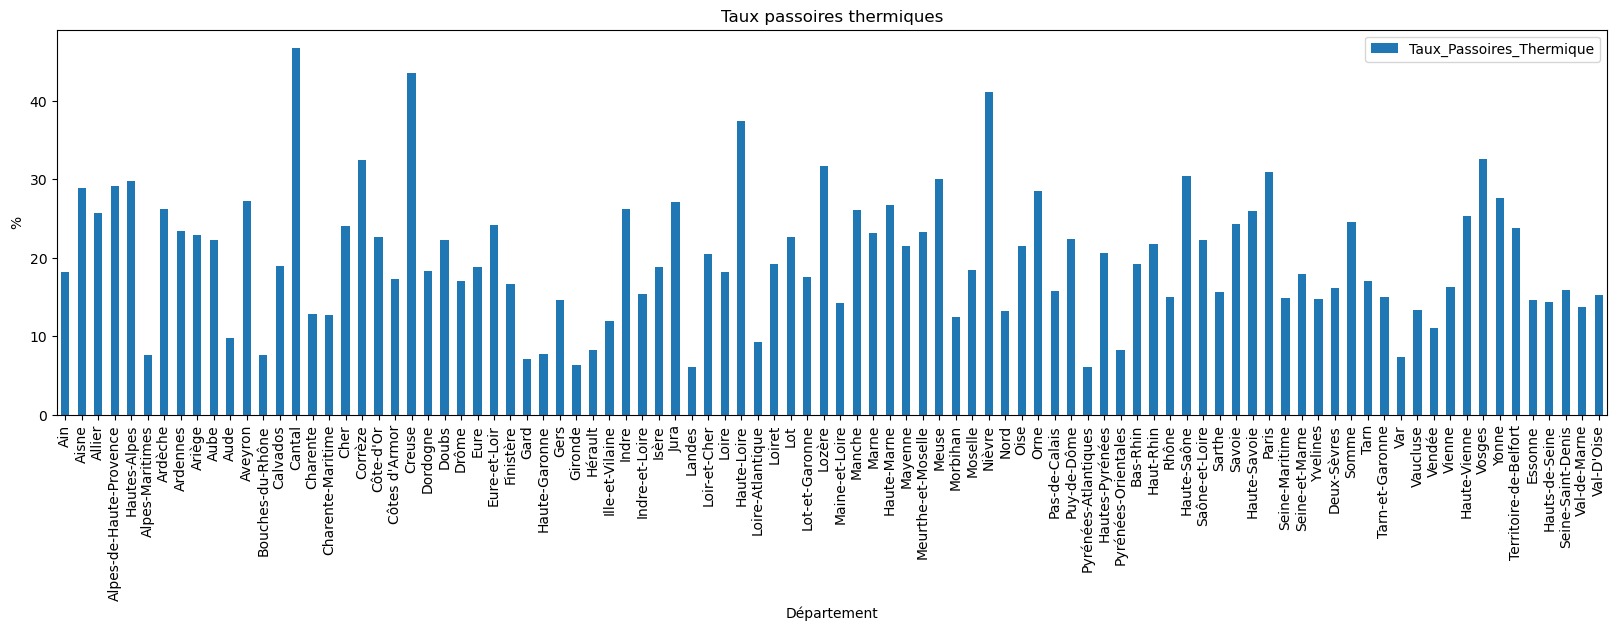

In [55]:
df_to_plot_2 = pd.DataFrame(df_bdd_nat_work,columns=['Département_nom','Taux_Passoires_Thermique'])
df_to_plot_2.plot(x ='Département_nom', y='Taux_Passoires_Thermique', kind = 'bar', figsize=(20,5), title="Taux passoires thermiques")
plt.xlabel('Département')
plt.ylabel('%')
plt.show()

## Un peu de visualisation spatiale

On commence par importer ce qu'il nous faut

In [17]:
!pip install pandas fiona shapely pyproj rtree # à faire obligatoirement en premier pour utiliser rtree ou pygeos pour les jointures spatiales
!pip install contextily
!pip install geopandas

import geopandas as gpd
import contextily as ctx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 13.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.9/118.9 kB 31.1 MB/s eta 0:00:00


In [18]:
!pip install --upgrade botocore==1.23.26  #Sur colab, sinon bug
!pip install --upgrade urllib3==1.22.0 #Sur colab, sinon bug
!pip install py7zr #Sur colab, sinon bug
!pip install s3fs #Sur colab, sinon bug
!git clone https://github.com/InseeFrLab/cartogether.git
%cd ./cartogether
!pip install -r requirements.txt
!pip install .

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 14.3 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: jmespath
    Found existing installation: jmespath 1.0.1
    Uninstalling jmespath-1.0.1:
      Successfully uninstalled jmespath-1.0.1
  Attempting uninstall: botocore
    Found existing installation: botocore 1.27.87
    Uninstalling botocore-1.27.87:
      Successfully uninstalled botocore-1.27.87
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
boto3 1.24.86 requires botocore<1.28.0,>=1.27.86, but you have botocore 1.23.26 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.3/132.3 kB 5.5 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.11
    Uninstalling urllib3-1.26.11:
      Successfully uninstalled urllib3-1.26.11
ERROR: pip's dependency resolver does not currently take into ac

In [125]:
from cartiflette.download import get_vectorfile_ign
france = get_vectorfile_ign(level = "COMMUNE", field = "metropole")

dep = get_vectorfile_ign(level = "DEPARTEMENT", field = "metropole")
dep["area"] = dep.area
dep.plot(column = "area")


ImportError: cannot import name 'ParamSpec' from 'typing_extensions' (/Users/francoisbellelarant/opt/anaconda3/lib/python3.8/site-packages/typing_extensions.py)